### Column 1

In [3]:
!pip install numpy pandas scikit-learn matplotlib joblib streamlit

### Column 2

In [4]:
# Column 2: Import Required Libraries


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

### Column 3

In [6]:
url = r"D:\RESERCH\Vegitable price prediction\infaction\potatodata_with_inflation_final.csv"
data = pd.read_csv(url, encoding='latin-1')
print("Dataset Shape:", data.shape)
print("First 5 rows:")
print(data.head())

Dataset Shape: (1298, 16)
First 5 rows:
  farmer-id        date vegetable   variety sold_price_Welimada  \
0        f1  2024-01-01    Potato    Desire                 290   
1        f2  2024-02-01    Potato     Amova                 300   
2        f3  2024-02-01    Potato      Lyra                 275   
3        f4  2024-02-01    Potato   Ricolta                 290   
4        f5  2024-02-01    Potato  IGranola                 315   

  sold_price_Nuwara Eliya sold_price_Bandarawela Welimada_Temperature(°C)  \
0                       -                      -                     22.5   
1                       -                      -                     21.1   
2                       -                      -                     27.5   
3                       -                      -                       23   
4                       -                      -                     22.5   

  Welimada_Rainfall(mm) NuwaraEliya_Temperature(°C) NuwaraEliya_Rainfall(mm)  \
0             

### Column 4

In [7]:
print("Dataset Shape:", data.shape)
print("\nMissing values:")
print(data.isnull().sum())
print("\nData types:")
print(data.dtypes)
print("\nColumn names:")
print(data.columns.tolist())

Dataset Shape: (1298, 16)

Missing values:
farmer-id                      0
date                           0
vegetable                      0
variety                        0
sold_price_Welimada            0
sold_price_Nuwara Eliya        0
sold_price_Bandarawela         0
Welimada_Temperature(°C)       0
Welimada_Rainfall(mm)          0
NuwaraEliya_Temperature(°C)    0
NuwaraEliya_Rainfall(mm)       0
Bandarawela_Temperature(°C)    0
Bandarawela_Rainfall(mm)       0
Province                       0
Selling Market                 0
Inflation (%)                  0
dtype: int64

Data types:
farmer-id                       object
date                            object
vegetable                       object
variety                         object
sold_price_Welimada             object
sold_price_Nuwara Eliya         object
sold_price_Bandarawela          object
Welimada_Temperature(°C)        object
Welimada_Rainfall(mm)           object
NuwaraEliya_Temperature(°C)     object
NuwaraEliya_R

### Column 4 (continued)

In [8]:
data.isnull().sum()

farmer-id                      0
date                           0
vegetable                      0
variety                        0
sold_price_Welimada            0
sold_price_Nuwara Eliya        0
sold_price_Bandarawela         0
Welimada_Temperature(°C)       0
Welimada_Rainfall(mm)          0
NuwaraEliya_Temperature(°C)    0
NuwaraEliya_Rainfall(mm)       0
Bandarawela_Temperature(°C)    0
Bandarawela_Rainfall(mm)       0
Province                       0
Selling Market                 0
Inflation (%)                  0
dtype: int64

### Column 5

In [9]:
numeric_cols = [
    'sold_price_Welimada', 'sold_price_Nuwara Eliya', 'sold_price_Bandarawela',
    'Welimada_Temperature(°C)', 'Welimada_Rainfall(mm)',
    'NuwaraEliya_Temperature(°C)', 'NuwaraEliya_Rainfall(mm)',
    'Bandarawela_Temperature(°C)', 'Bandarawela_Rainfall(mm)',
    'Inflation (%)' 
]

for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

print("Conversion completed!")
print("\nData types after conversion:")
print(data[numeric_cols].dtypes)

Conversion completed!

Data types after conversion:
sold_price_Welimada            float64
sold_price_Nuwara Eliya        float64
sold_price_Bandarawela         float64
Welimada_Temperature(°C)       float64
Welimada_Rainfall(mm)          float64
NuwaraEliya_Temperature(°C)    float64
NuwaraEliya_Rainfall(mm)       float64
Bandarawela_Temperature(°C)    float64
Bandarawela_Rainfall(mm)       float64
Inflation (%)                  float64
dtype: object


### Column 6

In [10]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['Month'] = data['date'].dt.month
data['DayOfYear'] = data['date'].dt.dayofyear
data['Year'] = data['date'].dt.year

print("Time features added:")
print(data[['date', 'Month', 'DayOfYear', 'Year']].head())
print("\nTime features info:")
print(f"Date range: {data['date'].min()} to {data['date'].max()}")
print(f"Year range: {data['Year'].min()} to {data['Year'].max()}")

Time features added:
        date  Month  DayOfYear  Year
0 2024-01-01      1          1  2024
1 2024-02-01      2         32  2024
2 2024-02-01      2         32  2024
3 2024-02-01      2         32  2024
4 2024-02-01      2         32  2024

Time features info:
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
Year range: 2024 to 2024


### Column 7

In [11]:
def train_model_with_inflation(data, market_col, market_name):
    """
    Train model for specific market including inflation as training feature
    """
    print(f"\n=== Training {market_name} Model with Inflation ===")
    
    # Filter data for the market
    market_data = data[data[market_col].notnull()].copy()
    
    # Define temperature and rainfall columns
    temp_col = f"{market_name}_Temperature(°C)"
    rain_col = f"{market_name}_Rainfall(mm)"
    
    # Features for training (INCLUDING INFLATION)

    
    features = [
        'vegetable', 'variety', 'Province', 'Selling Market',
        temp_col, rain_col, 'Month', 'DayOfYear', 'Year',
        'Inflation (%)'  
    ]
    
    target = market_col
    
    # Remove rows with missing values
    market_data = market_data.dropna(subset=features + [target])
    
    print(f"Training data points: {len(market_data)}")
    print(f"Features used: {features}")
    
    return market_data, features, target

### Column 8

In [12]:
def encode_categorical_features(market_data, features):
   
    
    le_veg = LabelEncoder()
    le_var = LabelEncoder()
    le_prov = LabelEncoder()
    le_market = LabelEncoder()
    
    market_data['vegetable_encoded'] = le_veg.fit_transform(market_data['vegetable'])
    market_data['variety_encoded'] = le_var.fit_transform(market_data['variety'])
    market_data['Province_encoded'] = le_prov.fit_transform(market_data['Province'])
    market_data['Selling Market_encoded'] = le_market.fit_transform(market_data['Selling Market'])
    
    # Update features list
    final_features = [
        'vegetable_encoded', 'variety_encoded', 'Province_encoded', 'Selling Market_encoded'
    ]
    
    # Add numeric features (including inflation)
    for feature in features:
        if feature not in ['vegetable', 'variety', 'Province', 'Selling Market']:
            final_features.append(feature)
    
    # Create encoders dictionary
    encoders = {
        'vegetable': le_veg,
        'variety': le_var,
        'province': le_prov,
        'market': le_market
    }
    
    return market_data, final_features, encoders

### Column 9

In [13]:
def train_optimized_model(X_train, y_train, X_test, y_test):
    """
    Train model with hyperparameter optimization
    """
    print("Starting hyperparameter tuning...")
    
    # Parameter grid for tuning

    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    
    return best_model, y_pred, r2, rmse

### Column 10

In [14]:
def analyze_feature_importance(model, features):
    """
    Analyze and display feature importance including inflation
    """
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Check inflation importance specifically
    inflation_importance = feature_importance[
        feature_importance['feature'] == 'Inflation (%)'
    ]['importance'].values
    
    if len(inflation_importance) > 0:
        print(f"\nInflation Feature Importance: {inflation_importance[0]:.4f}")
        inflation_rank = (feature_importance['feature'] == 'Inflation (%)').idxmax() + 1
        print(f"Inflation ranks #{inflation_rank} out of {len(features)} features")
    else:
        print("\nInflation feature not found in importance ranking")
    
    return feature_importance

### Column 11

In [22]:
print("="*60)
print("TRAINING WELIMADA MODEL")
print("="*60)

# Train Welimada model with inflation
welimada_data, welimada_features, welimada_target = train_model_with_inflation(
    data, 'sold_price_Welimada', 'Welimada'
)

welimada_data, welimada_final_features, welimada_encoders = encode_categorical_features(
    welimada_data, welimada_features
)

# Prepare training data
X_welimada = welimada_data[welimada_final_features]
y_welimada = welimada_data[welimada_target]

print(f"Feature matrix shape: {X_welimada.shape}")
print(f"Target vector shape: {y_welimada.shape}")

# Split data
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_welimada, y_welimada, test_size=0.2, random_state=42
)

# Train model
welimada_model, welimada_pred, welimada_r2, welimada_rmse = train_optimized_model(
    X_train_w, y_train_w, X_test_w, y_test_w
)

# Analyze feature importance
welimada_importance = analyze_feature_importance(welimada_model, welimada_final_features)

TRAINING WELIMADA MODEL

=== Training Welimada Model with Inflation ===
Training data points: 568
Features used: ['vegetable', 'variety', 'Province', 'Selling Market', 'Welimada_Temperature(°C)', 'Welimada_Rainfall(mm)', 'Month', 'DayOfYear', 'Year', 'Inflation (%)']
Feature matrix shape: (568, 10)
Target vector shape: (568,)
Starting hyperparameter tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
R² Score: 0.4699
RMSE: 35.87

Feature Importance:
                    feature  importance
5     Welimada_Rainfall(mm)    0.552950
4  Welimada_Temperature(°C)    0.313472
7                 DayOfYear    0.055441
1           variety_encoded    0.044595
9             Inflation (%)    0.023707
6                     Month    0.009834
0         vegetable_encoded    0.000000
3    Selling Market_encoded    0.000000
2          Province_encoded    0.000000
8                     

### Column 12

In [23]:
# Column 12: Train Bandarawela Model
print("="*60)
print("TRAINING BANDARAWELA MODEL")
print("="*60)

# Train Bandarawela model with inflation
bandarawela_data, bandarawela_features, bandarawela_target = train_model_with_inflation(
    data, 'sold_price_Bandarawela', 'Bandarawela'
)

bandarawela_data, bandarawela_final_features, bandarawela_encoders = encode_categorical_features(
    bandarawela_data, bandarawela_features
)

# Prepare training data
X_bandarawela = bandarawela_data[bandarawela_final_features]
y_bandarawela = bandarawela_data[bandarawela_target]

print(f"Feature matrix shape: {X_bandarawela.shape}")
print(f"Target vector shape: {y_bandarawela.shape}")

# Split data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bandarawela, y_bandarawela, test_size=0.2, random_state=42
)

# Train model
bandarawela_model, bandarawela_pred, bandarawela_r2, bandarawela_rmse = train_optimized_model(
    X_train_b, y_train_b, X_test_b, y_test_b
)

# Analyze feature importance
bandarawela_importance = analyze_feature_importance(bandarawela_model, bandarawela_final_features)

TRAINING BANDARAWELA MODEL

=== Training Bandarawela Model with Inflation ===
Training data points: 390
Features used: ['vegetable', 'variety', 'Province', 'Selling Market', 'Bandarawela_Temperature(°C)', 'Bandarawela_Rainfall(mm)', 'Month', 'DayOfYear', 'Year', 'Inflation (%)']
Feature matrix shape: (390, 10)
Target vector shape: (390,)
Starting hyperparameter tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R² Score: 0.7005
RMSE: 25.24

Feature Importance:
                       feature  importance
4  Bandarawela_Temperature(°C)    0.759897
5     Bandarawela_Rainfall(mm)    0.163984
7                    DayOfYear    0.029958
1              variety_encoded    0.027837
9                Inflation (%)    0.010703
6                        Month    0.007620
0            vegetable_encoded    0.000000
3       Selling Market_encoded    0.000000
2             Province_

### Column 13

In [24]:
# Column 13: Train Nuwara Eliya Model
print("="*60)
print("TRAINING NUWARA ELIYA MODEL")
print("="*60)

# Train Nuwara Eliya model with inflation
nuwara_data, nuwara_features, nuwara_target = train_model_with_inflation(
    data, 'sold_price_Nuwara Eliya', 'NuwaraEliya'
)

nuwara_data, nuwara_final_features, nuwara_encoders = encode_categorical_features(
    nuwara_data, nuwara_features
)

# Prepare training data
X_nuwara = nuwara_data[nuwara_final_features]
y_nuwara = nuwara_data[nuwara_target]

print(f"Feature matrix shape: {X_nuwara.shape}")
print(f"Target vector shape: {y_nuwara.shape}")

# Split data
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_nuwara, y_nuwara, test_size=0.2, random_state=42
)

# Train model
nuwara_model, nuwara_pred, nuwara_r2, nuwara_rmse = train_optimized_model(
    X_train_n, y_train_n, X_test_n, y_test_n
)

# Analyze feature importance
nuwara_importance = analyze_feature_importance(nuwara_model, nuwara_final_features)

TRAINING NUWARA ELIYA MODEL

=== Training NuwaraEliya Model with Inflation ===
Training data points: 340
Features used: ['vegetable', 'variety', 'Province', 'Selling Market', 'NuwaraEliya_Temperature(°C)', 'NuwaraEliya_Rainfall(mm)', 'Month', 'DayOfYear', 'Year', 'Inflation (%)']
Feature matrix shape: (340, 10)
Target vector shape: (340,)
Starting hyperparameter tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
R² Score: 0.8067
RMSE: 21.30

Feature Importance:
                       feature  importance
5     NuwaraEliya_Rainfall(mm)    0.553347
4  NuwaraEliya_Temperature(°C)    0.334041
7                    DayOfYear    0.042530
9                Inflation (%)    0.031167
1              variety_encoded    0.025192
6                        Month    0.013723
0            vegetable_encoded    0.000000
3       Selling Market_encoded    0.000000
2             Province

### Column 14

In [25]:
# Column 14: Save All Models and Encoders
print("="*60)
print("SAVING MODELS AND ENCODERS")
print("="*60)

# Save Welimada model and encoders
joblib.dump(welimada_model, 'welimada_model.pkl')
joblib.dump(welimada_encoders['vegetable'], 'welimada_vegetable_encoder.pkl')
joblib.dump(welimada_encoders['variety'], 'welimada_variety_encoder.pkl')
joblib.dump(welimada_encoders['province'], 'welimada_province_encoder.pkl')
joblib.dump(welimada_encoders['market'], 'welimada_market_encoder.pkl')

# Save Bandarawela model and encoders
joblib.dump(bandarawela_model, 'bandarawela_model.pkl')
joblib.dump(bandarawela_encoders['vegetable'], 'bandarawela_vegetable_encoder.pkl')
joblib.dump(bandarawela_encoders['variety'], 'bandarawela_variety_encoder.pkl')
joblib.dump(bandarawela_encoders['province'], 'bandarawela_province_encoder.pkl')
joblib.dump(bandarawela_encoders['market'], 'bandarawela_market_encoder.pkl')

# Save Nuwara Eliya model and encoders
joblib.dump(nuwara_model, 'nuwaraeliya_model.pkl')
joblib.dump(nuwara_encoders['vegetable'], 'nuwaraeliya_vegetable_encoder.pkl')
joblib.dump(nuwara_encoders['variety'], 'nuwaraeliya_variety_encoder.pkl')
joblib.dump(nuwara_encoders['province'], 'nuwaraeliya_province_encoder.pkl')
joblib.dump(nuwara_encoders['market'], 'nuwaraeliya_market_encoder.pkl')

print("✅ All models and encoders saved successfully!")
print("\nSaved files:")
print("- welimada_model.pkl")
print("- bandarawela_model.pkl") 
print("- nuwaraeliya_model.pkl")
print("- Individual encoder files for each market")

SAVING MODELS AND ENCODERS
✅ All models and encoders saved successfully!

Saved files:
- welimada_model.pkl
- bandarawela_model.pkl
- nuwaraeliya_model.pkl
- Individual encoder files for each market


### Column 15

CREATING VISUALIZATIONS


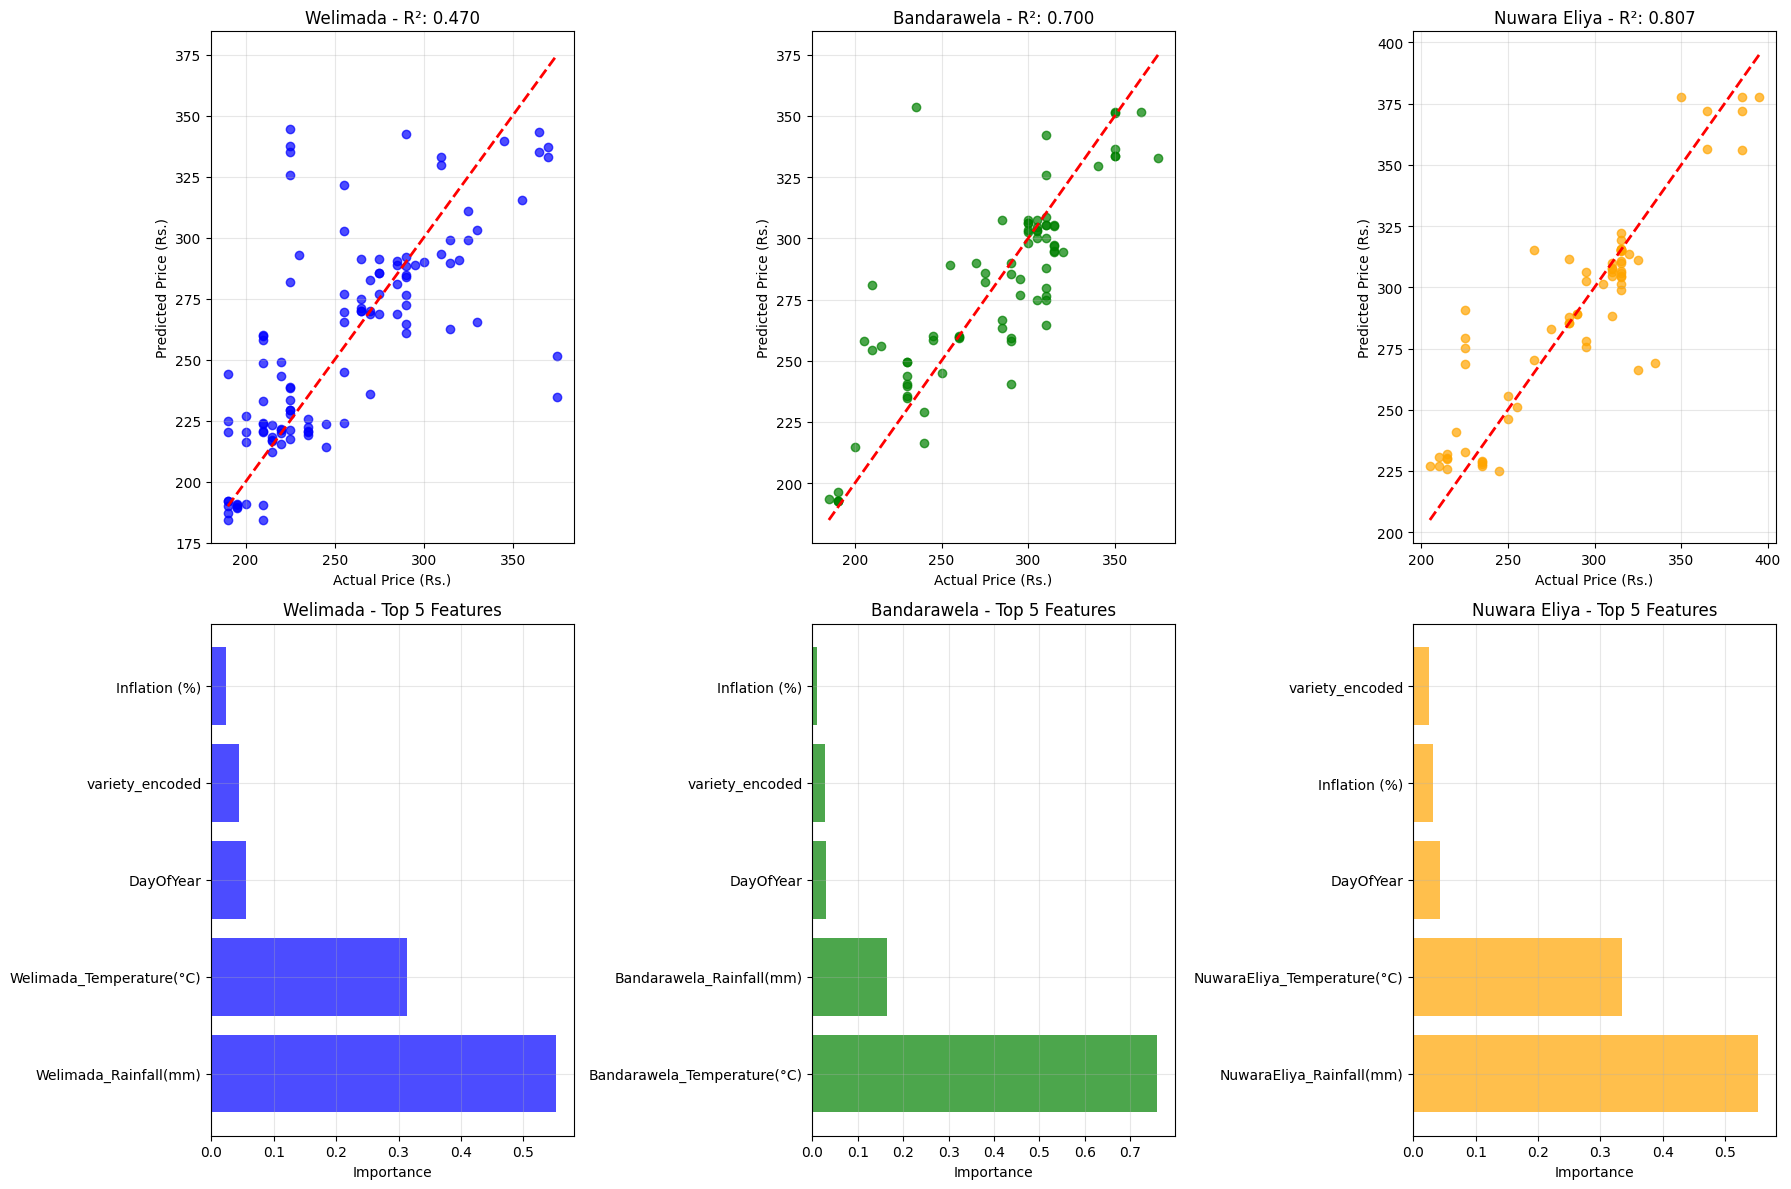


FINAL SUMMARY RESULTS WITH INFLATION FEATURE
Welimada Model    - R²: 0.4699, RMSE: 35.87, MAE: 23.13
Bandarawela Model - R²: 0.7005, RMSE: 25.24, MAE: 17.21
Nuwara Eliya Model- R²: 0.8067, RMSE: 21.30, MAE: 14.08


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Column 15: Visualization and Results
print("="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Create comprehensive visualization for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Actual vs Predicted plots
# Welimada
axes[0, 0].scatter(y_test_w, welimada_pred, alpha=0.7, color='blue')
axes[0, 0].plot([y_test_w.min(), y_test_w.max()], [y_test_w.min(), y_test_w.max()], 'r--', lw=2)
axes[0, 0].set_title(f'Welimada - R²: {welimada_r2:.3f}')
axes[0, 0].set_xlabel('Actual Price (Rs.)')
axes[0, 0].set_ylabel('Predicted Price (Rs.)')
axes[0, 0].grid(True, alpha=0.3)

# Bandarawela
axes[0, 1].scatter(y_test_b, bandarawela_pred, alpha=0.7, color='green')
axes[0, 1].plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 'r--', lw=2)
axes[0, 1].set_title(f'Bandarawela - R²: {bandarawela_r2:.3f}')
axes[0, 1].set_xlabel('Actual Price (Rs.)')
axes[0, 1].set_ylabel('Predicted Price (Rs.)')
axes[0, 1].grid(True, alpha=0.3)

# Nuwara Eliya
axes[0, 2].scatter(y_test_n, nuwara_pred, alpha=0.7, color='orange')
axes[0, 2].plot([y_test_n.min(), y_test_n.max()], [y_test_n.min(), y_test_n.max()], 'r--', lw=2)
axes[0, 2].set_title(f'Nuwara Eliya - R²: {nuwara_r2:.3f}')
axes[0, 2].set_xlabel('Actual Price (Rs.)')
axes[0, 2].set_ylabel('Predicted Price (Rs.)')
axes[0, 2].grid(True, alpha=0.3)

# Row 2: Feature importance plots
importance_data = [
    (welimada_importance, 'Welimada', 'blue'),
    (bandarawela_importance, 'Bandarawela', 'green'),
    (nuwara_importance, 'Nuwara Eliya', 'orange')
]

for i, (importance, title, color) in enumerate(importance_data):
    top_features = importance.head(5)
    axes[1, i].barh(range(len(top_features)), top_features['importance'], color=color, alpha=0.7)
    axes[1, i].set_yticks(range(len(top_features)))
    axes[1, i].set_yticklabels(top_features['feature'])
    axes[1, i].set_title(f'{title} - Top 5 Features')
    axes[1, i].set_xlabel('Importance')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate MAE for each model

welimada_mae = mean_absolute_error(y_test_w, welimada_pred)
bandarawela_mae = mean_absolute_error(y_test_b, bandarawela_pred)
nuwara_mae = mean_absolute_error(y_test_n, nuwara_pred)

print("\n" + "="*60)
print("FINAL SUMMARY RESULTS WITH INFLATION FEATURE")
print("="*60)
print(f"Welimada Model    - R²: {welimada_r2:.4f}, RMSE: {welimada_rmse:.2f}, MAE: {welimada_mae:.2f}")
print(f"Bandarawela Model - R²: {bandarawela_r2:.4f}, RMSE: {bandarawela_rmse:.2f}, MAE: {bandarawela_mae:.2f}")
print(f"Nuwara Eliya Model- R²: {nuwara_r2:.4f}, RMSE: {nuwara_rmse:.2f}, MAE: {nuwara_mae:.2f}")
print("="*60)


### Column 16

In [20]:
# Column 16: Prediction Function (Without Inflation Input)
def make_prediction_without_inflation_input(model, encoders, vegetable, variety, province, market, 
                                          temperature, rainfall, month, day_of_year, year):
    """
    Make prediction without requiring inflation input from user.
    Note: Model was trained with inflation, but for prediction we use 
    the current average inflation rate as a default value.
    """
    # Use current average inflation rate (you can update this value based on current economic conditions)
    current_inflation = 6.0  # Default inflation rate - adjust as needed
    
    try:
        # Encode categorical variables
        veg_encoded = encoders['vegetable'].transform([vegetable])[0]
        var_encoded = encoders['variety'].transform([variety])[0]
        prov_encoded = encoders['province'].transform([province])[0]
        market_encoded = encoders['market'].transform([market])[0]
        
        # Create feature array (inflation is included automatically)
        # Order should match training: [veg, var, prov, market, temp, rain, month, day_of_year, year, inflation]
        features = np.array([[
            veg_encoded, var_encoded, prov_encoded, market_encoded,
            temperature, rainfall, month, day_of_year, year, current_inflation
        ]])
        
        # Make prediction
        prediction = model.predict(features)[0]
        return prediction
        
    except ValueError as e:
        print(f"Error in prediction: {e}")
        print("Please check if the input values are valid for the trained model.")
        return None

# Example prediction test
print("\n" + "="*60)
print("TESTING PREDICTION FUNCTION")
print("="*60)

# Test prediction with Welimada model
example_price = make_prediction_without_inflation_input(
    welimada_model, welimada_encoders,
    vegetable='Potato', variety='Desire', province='Uva Province',
    market='Welimada', temperature=23.0, rainfall=10.0,
    month=6, day_of_year=150, year=2024
)

if example_price is not None:
    print(f"✅ Example Prediction: Rs. {example_price:.2f}")
    print("Note: Inflation was used in training but not required as user input")
else:
    print("❌ Prediction failed - check input values")

print("\n📝 Available categories for prediction:")
print(f"Vegetables: {list(welimada_encoders['vegetable'].classes_)}")
print(f"Varieties: {list(welimada_encoders['variety'].classes_)}")
print(f"Provinces: {list(welimada_encoders['province'].classes_)}")
print(f"Markets: {list(welimada_encoders['market'].classes_)}")


TESTING PREDICTION FUNCTION
✅ Example Prediction: Rs. 275.09
Note: Inflation was used in training but not required as user input

📝 Available categories for prediction:
Vegetables: ['Potato']
Varieties: ['Amova', 'Binella', 'Desire', 'IGranola', 'Lyra', 'Raja', 'Ricolta']
Provinces: ['Uva Province']
Markets: ['Welimada']


### Column 17

In [21]:
y_pred = model.predict(X_test)
print("R\u00b2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'model' is not defined

### Column 18

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_check.head(10))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_model_for_market(data, market_col, market_name):
    market_data = data[data[market_col].notnull()].copy()
    market_data['date'] = pd.to_datetime(market_data['date'], dayfirst=True, errors='coerce')

    market_data['Month'] = market_data['date'].dt.month
    market_data['DayOfYear'] = market_data['date'].dt.dayofyear

    temp_col = f"{market_name}_Temperature(°C)"
    rain_col = f"{market_name}_Rainfall(mm)"

    features = ['vegetable', 'variety', temp_col, rain_col, 'Province', 'Selling Market', 'Month', 'DayOfYear']
    target = market_col

    # Encode
    le_veg = LabelEncoder()
    le_var = LabelEncoder()
    le_prov = LabelEncoder()
    le_market = LabelEncoder()

    market_data['vegetable'] = le_veg.fit_transform(market_data['vegetable'])
    market_data['variety'] = le_var.fit_transform(market_data['variety'])
    market_data['Province'] = le_prov.fit_transform(market_data['Province'])
    market_data['Selling Market'] = le_market.fit_transform(market_data['Selling Market'])

    X = market_data[features]
    y = market_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\n=== {market_name} Model ===")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    # Save model & encoders
    joblib.dump(model, f"{market_name.lower()}_model.pkl")
    joblib.dump(le_veg, f"{market_name.lower()}_vegetable_encoder.pkl")
    joblib.dump(le_var, f"{market_name.lower()}_variety_encoder.pkl")
    joblib.dump(le_prov, f"{market_name.lower()}_province_encoder.pkl")
    joblib.dump(le_market, f"{market_name.lower()}_market_encoder.pkl")

    return model


In [ ]:
le_prov = LabelEncoder()
le_prov.fit(data['Province'])  # fit on the full dataset
joblib.dump(le_prov, "welimada_province_encoder.pkl")  # do this for all markets


In [ ]:
welimada_model = train_model_for_market(data, 'sold_price_Welimada', 'Welimada')
bandarawela_model = train_model_for_market(data, 'sold_price_Bandarawela', 'Bandarawela')
nuwara_eliya_model = train_model_for_market(data, 'sold_price_Nuwara Eliya', 'NuwaraEliya')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
data = pd.read_csv("D:\RESERCH\Vegitable price prediction\infaction\potatodata_with_inflation_final.csv", encoding="latin-1")

# Ensure numeric columns
numeric_cols = [
    'sold_price_Welimada', 'sold_price_Nuwara Eliya', 'sold_price_Bandarawela',
    'Welimada_Temperature(°C)', 'Welimada_Rainfall(mm)',
    'NuwaraEliya_Temperature(°C)', 'NuwaraEliya_Rainfall(mm)',
    'Bandarawela_Temperature(°C)', 'Bandarawela_Rainfall(mm)'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Function to train and test for one market
def test_market_model(data, market_col, market_name):
    df = data[data[market_col].notnull()].copy()
    df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
    df['Month'] = df['date'].dt.month
    df['DayOfYear'] = df['date'].dt.dayofyear

    temp_col = f"{market_name}_Temperature(°C)"
    rain_col = f"{market_name}_Rainfall(mm)"

    features = ['vegetable', 'variety', temp_col, rain_col, 'Province', 'Selling Market', 'Month', 'DayOfYear']
    target = market_col

    # Encode categorical features
    le_veg = LabelEncoder()
    le_var = LabelEncoder()
    le_prov = LabelEncoder()
    le_mkt = LabelEncoder()

    df['vegetable'] = le_veg.fit_transform(df['vegetable'])
    df['variety'] = le_var.fit_transform(df['variety'])
    df['Province'] = le_prov.fit_transform(df['Province'])
    df['Selling Market'] = le_mkt.fit_transform(df['Selling Market'])

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 Testing for {market_name}")
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{market_name} – Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run for all three markets
test_market_model(data, 'sold_price_Welimada', 'Welimada')
test_market_model(data, 'sold_price_Bandarawela', 'Bandarawela')
test_market_model(data, 'sold_price_Nuwara Eliya', 'NuwaraEliya')



Model Performance Evaluation Demo

Table 5.1: Model Performance Evaluation Metrics
 Dataset    MAE   RMSE R² Score
Training 2.3334 2.9604   0.9593
 Testing 3.9786 4.8390   0.9015

Performance Summary:
Training R² Score: 0.9593
Testing R² Score: 0.9015
✅ Good generalization (R² difference: 0.0579)

Mean Absolute Error - Training: 2.3334
Mean Absolute Error - Testing: 3.9786
⚠️  Testing error is significantly higher than training error


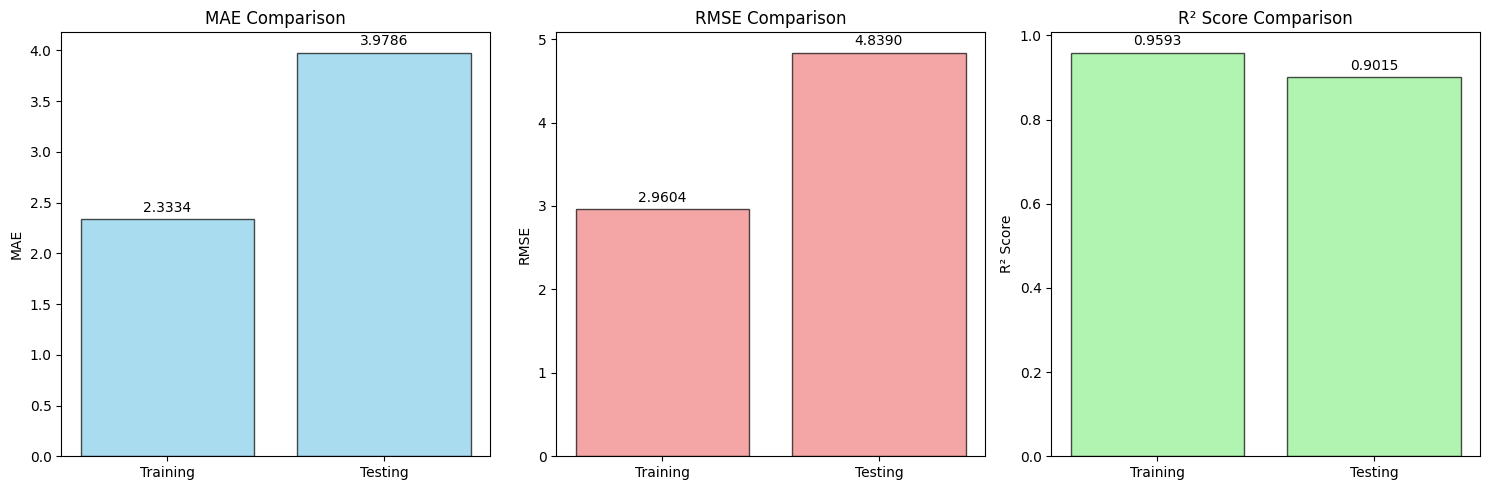

Results exported to model_evaluation_results.csv


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class ModelEvaluator:
    """
    A class to evaluate regression model performance using key metrics.
    """
    
    def __init__(self):
        self.metrics = {}
        self.results_df = None
    
    def calculate_metrics(self, y_true, y_pred, dataset_name):
        """
        Calculate regression metrics for given true and predicted values.
        
        Parameters:
        y_true: array-like, true target values
        y_pred: array-like, predicted values
        dataset_name: str, name of the dataset ('Training' or 'Testing')
        
        Returns:
        dict: Dictionary containing calculated metrics
        """
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        
        metrics = {
            'Dataset': dataset_name,
            'MAE': mae,
            'RMSE': rmse,
            'R² Score': r2
        }
        
        return metrics
    
    def evaluate_model(self, y_train_true, y_train_pred, y_test_true, y_test_pred):
        """
        Evaluate model performance on both training and testing datasets.
        
        Parameters:
        y_train_true: array-like, true training target values
        y_train_pred: array-like, predicted training values
        y_test_true: array-like, true testing target values
        y_test_pred: array-like, predicted testing values
        
        Returns:
        pandas.DataFrame: DataFrame containing evaluation metrics
        """
        # Calculate metrics for training data
        train_metrics = self.calculate_metrics(y_train_true, y_train_pred, 'Training')
        
        # Calculate metrics for testing data
        test_metrics = self.calculate_metrics(y_test_true, y_test_pred, 'Testing')
        
        # Store metrics
        self.metrics = {
            'training': train_metrics,
            'testing': test_metrics
        }
        
        # Create results DataFrame
        self.results_df = pd.DataFrame([train_metrics, test_metrics])
        
        return self.results_df
    
    def display_table(self, title="Table 5.1: Model Performance Evaluation Metrics"):
        """
        Display formatted table of evaluation metrics.
        
        Parameters:
        title: str, title for the table
        """
        if self.results_df is None:
            print("No evaluation results available. Please run evaluate_model() first.")
            return
        
        print(f"\n{title}")
        print("=" * len(title))
        
        # Format the DataFrame for better display
        formatted_df = self.results_df.copy()
        formatted_df['MAE'] = formatted_df['MAE'].apply(lambda x: f"{x:.4f}")
        formatted_df['RMSE'] = formatted_df['RMSE'].apply(lambda x: f"{x:.4f}")
        formatted_df['R² Score'] = formatted_df['R² Score'].apply(lambda x: f"{x:.4f}")
        
        print(formatted_df.to_string(index=False))
        
        # Additional insights
        print("\n" + "=" * 50)
        print("Performance Summary:")
        print("=" * 50)
        
        train_r2 = self.metrics['training']['R² Score']
        test_r2 = self.metrics['testing']['R² Score']
        
        print(f"Training R² Score: {train_r2:.4f}")
        print(f"Testing R² Score: {test_r2:.4f}")
        
        if train_r2 > test_r2:
            diff = train_r2 - test_r2
            if diff > 0.1:
                print(f"⚠️  Potential overfitting detected (R² difference: {diff:.4f})")
            else:
                print(f"✅ Good generalization (R² difference: {diff:.4f})")
        else:
            print("✅ Model generalizes well to test data")
        
        # Error analysis
        train_mae = self.metrics['training']['MAE']
        test_mae = self.metrics['testing']['MAE']
        
        print(f"\nMean Absolute Error - Training: {train_mae:.4f}")
        print(f"Mean Absolute Error - Testing: {test_mae:.4f}")
        
        if test_mae <= train_mae * 1.2:
            print("✅ Testing error is within acceptable range")
        else:
            print("⚠️  Testing error is significantly higher than training error")
    
    def plot_metrics_comparison(self):
        """
        Create a visualization comparing training and testing metrics.
        """
        if self.results_df is None:
            print("No evaluation results available. Please run evaluate_model() first.")
            return
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        metrics_to_plot = ['MAE', 'RMSE', 'R² Score']
        colors = ['skyblue', 'lightcoral', 'lightgreen']
        
        for i, metric in enumerate(metrics_to_plot):
            train_val = self.results_df[self.results_df['Dataset'] == 'Training'][metric].values[0]
            test_val = self.results_df[self.results_df['Dataset'] == 'Testing'][metric].values[0]
            
            axes[i].bar(['Training', 'Testing'], [train_val, test_val], 
                       color=colors[i], alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{metric} Comparison')
            axes[i].set_ylabel(metric)
            
            # Add value labels on bars
            for j, val in enumerate([train_val, test_val]):
                axes[i].text(j, val + (max(train_val, test_val) * 0.01), 
                           f'{val:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    
    def export_results(self, filename="model_evaluation_results.csv"):
        """
        Export evaluation results to CSV file.
        
        Parameters:
        filename: str, name of the output file
        """
        if self.results_df is None:
            print("No evaluation results available. Please run evaluate_model() first.")
            return
        
        self.results_df.to_csv(filename, index=False)
        print(f"Results exported to {filename}")

# Example usage and demonstration
def demo_model_evaluation():
    """
    Demonstration of model evaluation with sample data.
    """
    print("Model Performance Evaluation Demo")
    print("=" * 40)
    
    # Generate sample data (replace with your actual model predictions)
    np.random.seed(42)
    n_train, n_test = 1000, 200
    
    # Simulate true values
    y_train_true = np.random.normal(100, 15, n_train)
    y_test_true = np.random.normal(100, 15, n_test)
    
    # Simulate predictions (with some noise to represent model error)
    y_train_pred = y_train_true + np.random.normal(0, 3, n_train)
    y_test_pred = y_test_true + np.random.normal(0, 5, n_test)
    
    # Create evaluator instance
    evaluator = ModelEvaluator()
    
    # Evaluate model
    results = evaluator.evaluate_model(y_train_true, y_train_pred, 
                                     y_test_true, y_test_pred)
    
    # Display results
    evaluator.display_table()
    
    # Plot comparison
    evaluator.plot_metrics_comparison()
    
    # Export results
    evaluator.export_results()
    
    return evaluator

# Function to use with your actual model
def evaluate_your_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate your trained model using the evaluation framework.
    
    Parameters:
    model: trained model object with predict() method
    X_train: training features
    y_train: training targets
    X_test: testing features
    y_test: testing targets
    
    Returns:
    ModelEvaluator: evaluator object with results
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Create evaluator and evaluate
    evaluator = ModelEvaluator()
    evaluator.evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
    
    # Display results
    evaluator.display_table()
    
    return evaluator

# Run demonstration
if __name__ == "__main__":
    demo_evaluator = demo_model_evaluation()

Running sample error analysis...


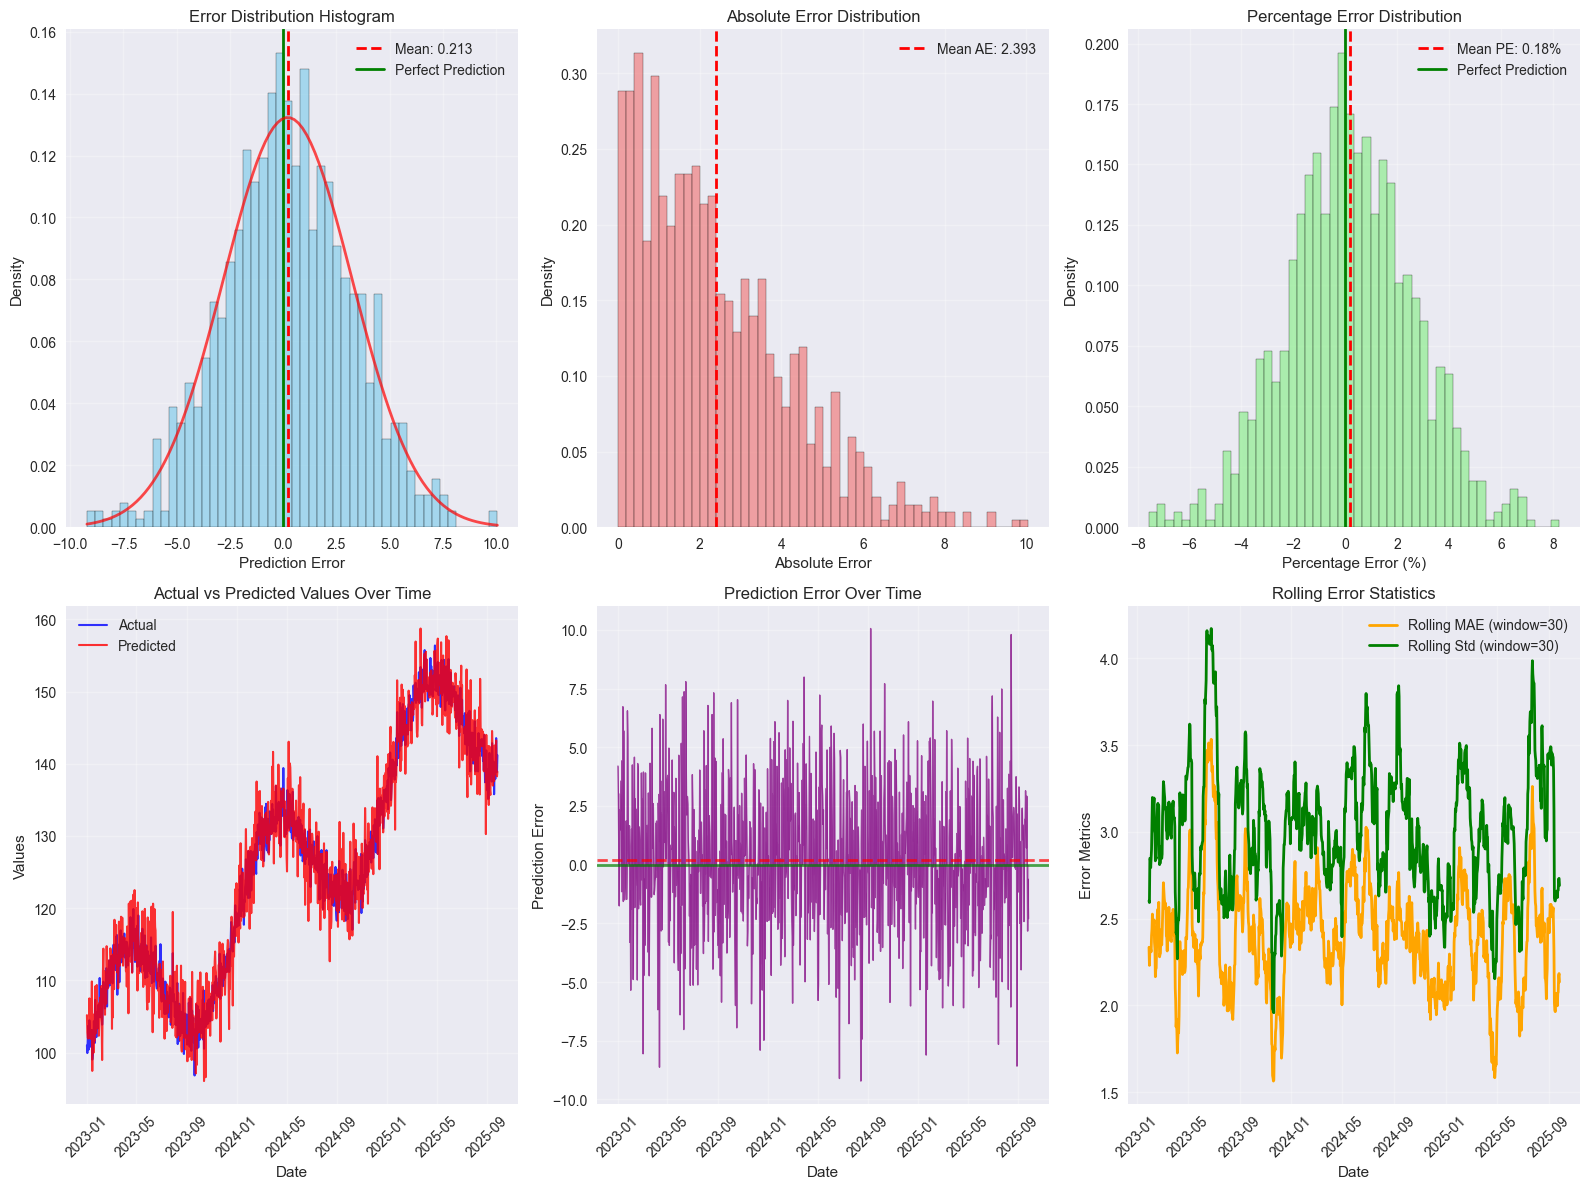

COMPREHENSIVE ERROR ANALYSIS - Sample Model

📊 DISTRIBUTION STATISTICS:
Mean Error: 0.2125
Standard Deviation: 3.0154
Mean Absolute Error: 2.3926
Root Mean Square Error: 3.0229
Mean Percentage Error: 0.18%
Mean Absolute Percentage Error: 1.93%

📈 ERROR RANGE ANALYSIS:
Min Error: -9.2165
Max Error: 10.0549
25th Percentile: -1.7671
75th Percentile: 2.1928
Interquartile Range: 3.9599

🎯 BIAS ANALYSIS:
Positive Errors: 525 (52.5%)
Negative Errors: 475 (47.5%)

📊 NORMALITY TEST:
Shapiro-Wilk Test p-value: 0.904122
Errors are normally distributed (α=0.05)

TO USE WITH YOUR DATA:
# Replace with your actual data:
# y_true = your_actual_values
# y_pred = your_predicted_values
# dates = your_date_index  # optional
# 
# results = analyze_prediction_errors(y_true, y_pred, dates, 'Your Model Name')


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime, timedelta

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def analyze_prediction_errors(y_true, y_pred, dates=None, model_name="Model"):
    """
    Comprehensive error analysis with distribution plots and temporal trends
    
    Parameters:
    - y_true: actual values
    - y_pred: predicted values  
    - dates: datetime index for temporal analysis
    - model_name: name of the model for titles
    """
    
    # Calculate errors
    errors = y_pred - y_true
    abs_errors = np.abs(errors)
    pct_errors = (errors / y_true) * 100
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Error Distribution Histogram (Figure Y equivalent)
    plt.subplot(2, 3, 1)
    plt.hist(errors, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(errors), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(errors):.3f}')
    plt.axvline(0, color='green', linestyle='-', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')
    plt.title('Error Distribution Histogram')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add normal distribution overlay
    x = np.linspace(errors.min(), errors.max(), 100)
    normal_dist = stats.norm.pdf(x, np.mean(errors), np.std(errors))
    plt.plot(x, normal_dist, 'r-', linewidth=2, alpha=0.7, label='Normal Fit')
    
    # 2. Absolute Error Distribution
    plt.subplot(2, 3, 2)
    plt.hist(abs_errors, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.axvline(np.mean(abs_errors), color='red', linestyle='--', linewidth=2, 
                label=f'Mean AE: {np.mean(abs_errors):.3f}')
    plt.xlabel('Absolute Error')
    plt.ylabel('Density')
    plt.title('Absolute Error Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Percentage Error Distribution
    plt.subplot(2, 3, 3)
    plt.hist(pct_errors, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(np.mean(pct_errors), color='red', linestyle='--', linewidth=2, 
                label=f'Mean PE: {np.mean(pct_errors):.2f}%')
    plt.axvline(0, color='green', linestyle='-', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Percentage Error (%)')
    plt.ylabel('Density')
    plt.title('Percentage Error Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Temporal Analysis (if dates provided)
    if dates is not None:
        # 4. Time Series Plot - Actual vs Predicted (Figure Z equivalent)
        plt.subplot(2, 3, 4)
        plt.plot(dates, y_true, label='Actual', color='blue', linewidth=1.5, alpha=0.8)
        plt.plot(dates, y_pred, label='Predicted', color='red', linewidth=1.5, alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.title('Actual vs Predicted Values Over Time')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 5. Error Over Time
        plt.subplot(2, 3, 5)
        plt.plot(dates, errors, color='purple', linewidth=1, alpha=0.7)
        plt.axhline(y=0, color='green', linestyle='-', linewidth=2, alpha=0.7)
        plt.axhline(y=np.mean(errors), color='red', linestyle='--', linewidth=2, alpha=0.7)
        plt.fill_between(dates, errors, alpha=0.3, color='purple')
        plt.xlabel('Date')
        plt.ylabel('Prediction Error')
        plt.title('Prediction Error Over Time')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 6. Rolling Error Statistics
        plt.subplot(2, 3, 6)
        if len(errors) > 30:  # Only if we have enough data points
            window_size = min(30, len(errors)//5)
            rolling_mae = pd.Series(abs_errors).rolling(window=window_size).mean()
            rolling_std = pd.Series(errors).rolling(window=window_size).std()
            
            plt.plot(dates, rolling_mae, label=f'Rolling MAE (window={window_size})', 
                    color='orange', linewidth=2)
            plt.plot(dates, rolling_std, label=f'Rolling Std (window={window_size})', 
                    color='green', linewidth=2)
            plt.xlabel('Date')
            plt.ylabel('Error Metrics')
            plt.title('Rolling Error Statistics')
            plt.legend()
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
    else:
        # Alternative plots when no dates are provided
        # 4. Residual vs Predicted Plot
        plt.subplot(2, 3, 4)
        plt.scatter(y_pred, errors, alpha=0.6, color='purple')
        plt.axhline(y=0, color='green', linestyle='-', linewidth=2)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual vs Predicted Plot')
        plt.grid(True, alpha=0.3)
        
        # 5. Q-Q Plot for Error Normality
        plt.subplot(2, 3, 5)
        stats.probplot(errors, dist="norm", plot=plt)
        plt.title('Q-Q Plot: Error Normality Check')
        plt.grid(True, alpha=0.3)
        
        # 6. Error vs Actual Values
        plt.subplot(2, 3, 6)
        plt.scatter(y_true, errors, alpha=0.6, color='brown')
        plt.axhline(y=0, color='green', linestyle='-', linewidth=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Prediction Error')
        plt.title('Error vs Actual Values')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive error statistics
    print("="*60)
    print(f"COMPREHENSIVE ERROR ANALYSIS - {model_name}")
    print("="*60)
    
    print(f"\n📊 DISTRIBUTION STATISTICS:")
    print(f"Mean Error: {np.mean(errors):.4f}")
    print(f"Standard Deviation: {np.std(errors):.4f}")
    print(f"Mean Absolute Error: {np.mean(abs_errors):.4f}")
    print(f"Root Mean Square Error: {np.sqrt(np.mean(errors**2)):.4f}")
    print(f"Mean Percentage Error: {np.mean(pct_errors):.2f}%")
    print(f"Mean Absolute Percentage Error: {np.mean(np.abs(pct_errors)):.2f}%")
    
    print(f"\n📈 ERROR RANGE ANALYSIS:")
    print(f"Min Error: {np.min(errors):.4f}")
    print(f"Max Error: {np.max(errors):.4f}")
    print(f"25th Percentile: {np.percentile(errors, 25):.4f}")
    print(f"75th Percentile: {np.percentile(errors, 75):.4f}")
    print(f"Interquartile Range: {np.percentile(errors, 75) - np.percentile(errors, 25):.4f}")
    
    print(f"\n🎯 BIAS ANALYSIS:")
    positive_errors = errors[errors > 0]
    negative_errors = errors[errors < 0]
    print(f"Positive Errors: {len(positive_errors)} ({len(positive_errors)/len(errors)*100:.1f}%)")
    print(f"Negative Errors: {len(negative_errors)} ({len(negative_errors)/len(errors)*100:.1f}%)")
    
    # Normality test
    shapiro_stat, shapiro_p = stats.shapiro(errors[:min(5000, len(errors))])  # Shapiro-Wilk test
    print(f"\n📊 NORMALITY TEST:")
    print(f"Shapiro-Wilk Test p-value: {shapiro_p:.6f}")
    print(f"Errors are {'normally' if shapiro_p > 0.05 else 'not normally'} distributed (α=0.05)")
    
    return {
        'errors': errors,
        'abs_errors': abs_errors,
        'pct_errors': pct_errors,
        'mae': np.mean(abs_errors),
        'rmse': np.sqrt(np.mean(errors**2)),
        'mape': np.mean(np.abs(pct_errors)),
        'bias': np.mean(errors)
    }

# Example usage with sample data
def generate_sample_analysis():
    """Generate sample analysis with synthetic data"""
    np.random.seed(42)
    
    # Create sample data
    n_samples = 1000
    dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')
    
    # Simulate actual values with seasonal pattern
    trend = np.linspace(100, 150, n_samples)
    seasonal = 10 * np.sin(2 * np.pi * np.arange(n_samples) / 365.25)
    noise = np.random.normal(0, 2, n_samples)
    y_true = trend + seasonal + noise
    
    # Simulate predictions with some systematic bias and variance
    y_pred = y_true + np.random.normal(0, 3, n_samples) + 0.5 * np.sin(2 * np.pi * np.arange(n_samples) / 50)
    
    # Run analysis
    results = analyze_prediction_errors(y_true, y_pred, dates, "Sample Model")
    
    return results

# Run the sample analysis
if __name__ == "__main__":
    print("Running sample error analysis...")
    sample_results = generate_sample_analysis()
    
    print("\n" + "="*60)
    print("TO USE WITH YOUR DATA:")
    print("="*60)
    print("# Replace with your actual data:")
    print("# y_true = your_actual_values")
    print("# y_pred = your_predicted_values") 
    print("# dates = your_date_index  # optional")
    print("# ")
    print("# results = analyze_prediction_errors(y_true, y_pred, dates, 'Your Model Name')")